In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

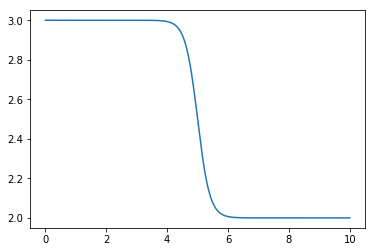

In [5]:
def impulse(x, x0, mu=10., u2=1., u1=0., t=0.):
    return 1/2*(u1+u2) - 1/2*(u2-u1)*np.tanh((u2-u1)/(4*mu)*(x-(u1+u2)*t/2-x0))
x = np.linspace(0, 10, 1000)
plt.plot(x, impulse(x, 5, 0.1, 3, 2))

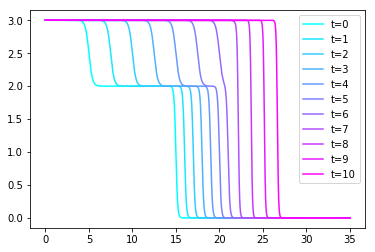

In [3]:
nu = 0.1

dx = 0.01
x_max = 35.
x = np.arange(0, x_max, dx)

dt = min(0.4*dx, 0.1*dx*dx/nu)
t_max = 10.1
ts = np.arange(0, t_max, dt)

t_print = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
t_print_real = []
for tval in t_print:
    t_print_real.append(ts[np.searchsorted(ts, tval)])

u = impulse(x, 5, nu, 1, 0) + impulse(x, 15, nu, 2, 0)
cmap = plt.get_cmap("cool")

assert dx < 4*nu/u.max()/5, "too large dx, should be < {}".format(4*nu/max(u)/5)

for t in ts:
    up = np.pad(u, (1, 1), 'edge')
    up2 = up * up
    u -= dt/(4*dx) * (up2[2:]-up2[:-2])
    u += nu*dt/(dx*dx) * (up[2:]-2*up[1:-1]+up[:-2])
    if t in t_print_real:
        plt.plot(x, u, c=cmap(t/t_max))
plt.legend(["t={}".format(tval) for tval in t_print])